In [1]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer, f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("trainingdata.csv")
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


Data preparation

In [58]:
df.shape

(175341, 45)

Data cleaning

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [60]:
#checking for missing values
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [61]:
#cheching for duplicate rows
df.duplicated().sum()

0

In [62]:
df= df. drop(['id'], axis=1)
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


EDA

checking distribution of target variable 

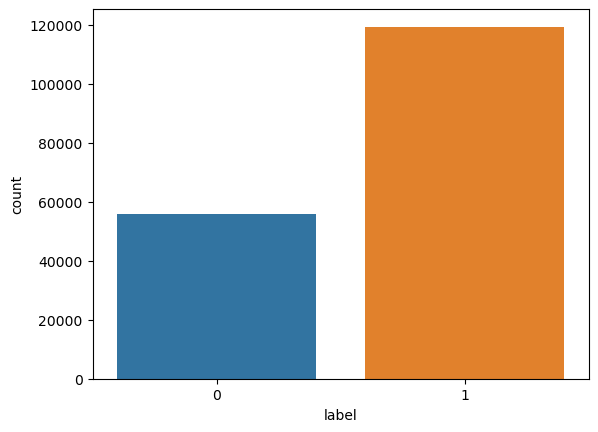

In [63]:
# Check the distribution of the target variable
sns.countplot(df["label"])
plt.show()

In [64]:
#using the fit_transform function, which will automatically handle unknown labels.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[['proto','service','state','attack_cat']] = df[['proto','service','state','attack_cat']].apply(lambda x: le.fit_transform(x))
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,113,0,2,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,6,0
1,0.649902,113,0,2,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,6,0
2,1.623129,113,0,2,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,6,0
3,1.681642,113,3,2,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,6,0
4,0.449454,113,0,2,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,119,2,3,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,5,1
175337,0.505762,113,0,2,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,8,1
175338,0.000009,119,2,3,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,5,1
175339,0.000009,119,2,3,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,5,1


data normalization 

In [65]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
msc=MinMaxScaler()
df=pd.DataFrame(msc.fit_transform(df),columns=df.columns)
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.002025,0.856061,0.00,0.25,0.000520,0.000364,0.000018,0.000012,0.000074,0.988235,...,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.666667,0.0
1,0.010832,0.856061,0.00,0.25,0.001352,0.003463,0.000054,0.002867,0.000078,0.243137,...,0.0,0.015625,0.00,0.00,0.0,0.000000,0.081967,0.0,0.666667,0.0
2,0.027052,0.856061,0.00,0.25,0.000728,0.001458,0.000026,0.000900,0.000014,0.243137,...,0.0,0.031250,0.00,0.00,0.0,0.016949,0.081967,0.0,0.666667,0.0
3,0.028027,0.856061,0.25,0.25,0.001144,0.001093,0.000046,0.000053,0.000014,0.243137,...,0.0,0.031250,0.25,0.25,0.0,0.016949,0.000000,0.0,0.666667,0.0
4,0.007491,0.856061,0.00,0.25,0.000936,0.000547,0.000039,0.000018,0.000033,0.996078,...,0.0,0.609375,0.00,0.00,0.0,0.016949,0.622951,0.0,0.666667,0.0


In [66]:
y=df.iloc[:,[-1]]
y

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
175336,1.0
175337,1.0
175338,1.0
175339,1.0


In [67]:
x=df.drop(y.columns, axis=1)
x

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,2.024634e-03,0.856061,0.000000,0.250,0.000520,0.000364,0.000018,0.000012,0.000074,0.988235,...,0.00,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.666667
1,1.083170e-02,0.856061,0.000000,0.250,0.001352,0.003463,0.000054,0.002867,0.000078,0.243137,...,0.00,0.000000,0.015625,0.00,0.00,0.0,0.000000,0.081967,0.0,0.666667
2,2.705215e-02,0.856061,0.000000,0.250,0.000728,0.001458,0.000026,0.000900,0.000014,0.243137,...,0.00,0.000000,0.031250,0.00,0.00,0.0,0.016949,0.081967,0.0,0.666667
3,2.802737e-02,0.856061,0.250000,0.250,0.001144,0.001093,0.000046,0.000053,0.000014,0.243137,...,0.00,0.000000,0.031250,0.25,0.25,0.0,0.016949,0.000000,0.0,0.666667
4,7.490901e-03,0.856061,0.000000,0.250,0.000936,0.000547,0.000039,0.000018,0.000033,0.996078,...,0.02,0.000000,0.609375,0.00,0.00,0.0,0.016949,0.622951,0.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,1.500000e-07,0.901515,0.166667,0.375,0.000104,0.000000,0.000007,0.000000,0.111111,0.996078,...,0.46,0.266667,0.359375,0.00,0.00,0.0,0.389831,0.377049,0.0,0.555556
175337,8.429368e-03,0.856061,0.000000,0.250,0.000936,0.000729,0.000046,0.000024,0.000034,0.996078,...,0.00,0.000000,0.015625,0.00,0.00,0.0,0.000000,0.000000,0.0,0.888889
175338,1.500000e-07,0.901515,0.166667,0.375,0.000104,0.000000,0.000007,0.000000,0.111111,0.996078,...,0.04,0.044444,0.187500,0.00,0.00,0.0,0.033898,0.180328,0.0,0.555556
175339,1.500000e-07,0.901515,0.166667,0.375,0.000104,0.000000,0.000007,0.000000,0.111111,0.996078,...,0.58,0.288889,0.453125,0.00,0.00,0.0,0.491525,0.475410,0.0,0.555556


In [68]:
# split bu using train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=0)

In [69]:
print(y_train.value_counts())

label
1.0      83430
0.0      39308
dtype: int64


In [70]:
y_test.value_counts()

label
1.0      35911
0.0      16692
dtype: int64

In [71]:
#Check if training set and test set have features in the same order
X_train.keys() == X_test.keys()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

Model Implementation

Training time: 5.25sec
accuracy of the model: 0.940554721213619
classification report:
               precision    recall  f1-score   support

      normal       0.93      0.88      0.90     16692
      attack       0.95      0.97      0.96     35911

    accuracy                           0.94     52603
   macro avg       0.94      0.93      0.93     52603
weighted avg       0.94      0.94      0.94     52603

Confusion Matrix:



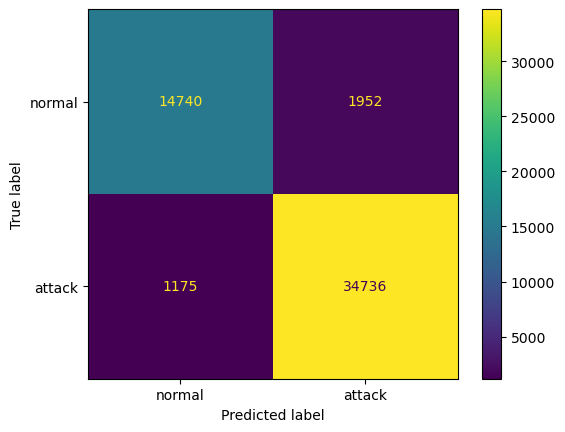

In [83]:
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
model_lr = LogisticRegression(max_iter= 1000)

start = time.time()

model_lr.fit(X_train, y_train)

end = time.time()
print('Training time: ' + str(round(end-start, 2)) + 'sec')

y_pred = model_lr.predict(X_test)

print("accuracy of the model:",accuracy_score(y_test, y_pred))

#Classification report
print("classification report:\n",classification_report(y_test,y_pred,target_names = ['normal','attack']))

#confusion matrix
print("Confusion Matrix:\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,display_labels = ['normal','attack'])
plt.show()

Training time: 0.25 sec
accuracy of the model:
 0.9755907457749557
classification report:
               precision    recall  f1-score   support

      normal       1.00      0.92      0.96     16692
      attack       0.97      1.00      0.98     35911

    accuracy                           0.98     52603
   macro avg       0.98      0.96      0.97     52603
weighted avg       0.98      0.98      0.98     52603

confusion matrix:


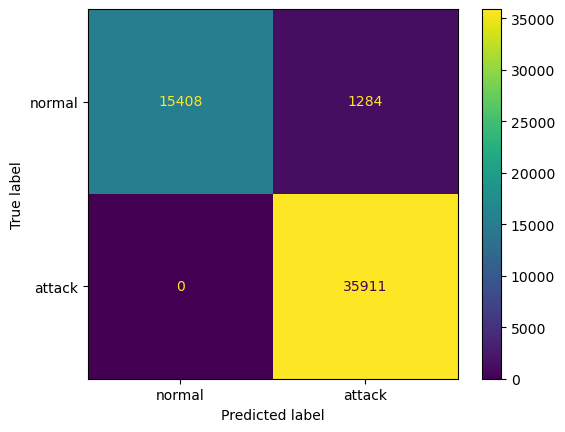

In [86]:
model_nbg = GaussianNB()

start = time.time()
model_nbg.fit(X_train, y_train)
end = time.time()
print('Training time: ' + str(round(end-start, 2)) + ' sec')


y_pred = model_nbg.predict(X_test)

print("accuracy of the model:\n",accuracy_score(y_test, y_pred))

#Classification report
print("classification report:\n",classification_report(y_test,y_pred,target_names = ['normal','attack']))

#confusion matrix
print("confusion matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,display_labels = ['normal','attack'])
plt.show()

Training time: 0.34 sec
accuracy of the model:
 0.739463528696082
classification report:
               precision    recall  f1-score   support

      normal       0.56      0.90      0.69     16692
      attack       0.93      0.67      0.78     35911

    accuracy                           0.74     52603
   macro avg       0.74      0.78      0.73     52603
weighted avg       0.81      0.74      0.75     52603

confusion matrix:



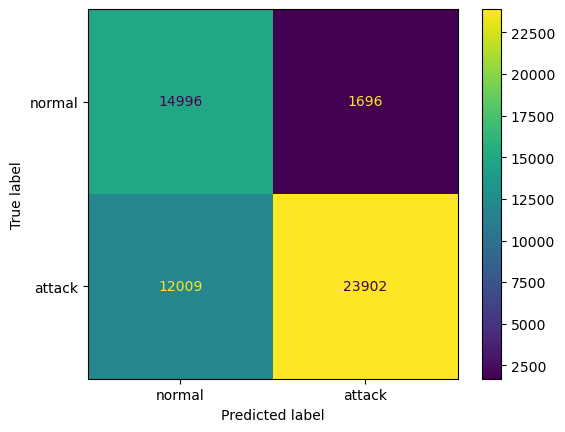

In [74]:
from sklearn.naive_bayes import ComplementNB
model_nbc = ComplementNB()
start = time.time()
model_nbc.fit(X_train, y_train)
end = time.time()
print('Training time: ' + str(round(end-start, 2)) + ' sec')


y_pred = model_nbc.predict(X_test)

print("accuracy of the model:\n",accuracy_score(y_test, y_pred))

#Classification report
print("classification report:\n",classification_report(y_test,y_pred,target_names = ['normal','attack']))

#confusion matrix
print("confusion matrix:\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,display_labels = ['normal','attack'])
plt.show()

Training time: 127.67 sec
accuracy of the model: 0.9996578141931068
classification report:
               precision    recall  f1-score   support

      normal       1.00      1.00      1.00     16692
      attack       1.00      1.00      1.00     35911

    accuracy                           1.00     52603
   macro avg       1.00      1.00      1.00     52603
weighted avg       1.00      1.00      1.00     52603

Confusion Matrix:



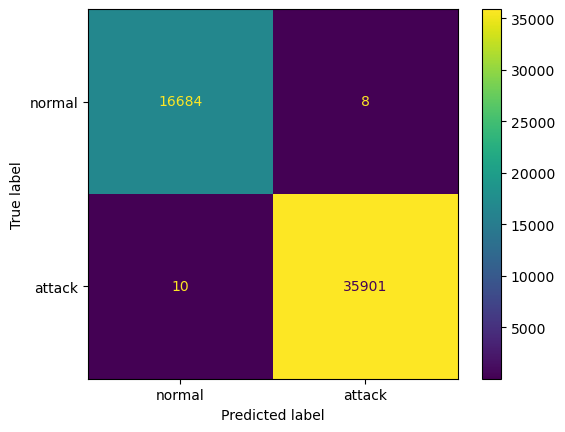

In [77]:
model_nn = MLPClassifier(solver='adam', max_iter=1000, hidden_layer_sizes = (10,5))

start = time.time()
model_nn.fit(X_train, y_train)
end = time.time()
print('Training time: ' + str(round(end-start, 2)) + ' sec')

y_pred = model_nn.predict(X_test)

print("accuracy of the model:",accuracy_score(y_test, y_pred))

#Classification report
print("classification report:\n",classification_report(y_test,y_pred,target_names = ['normal','attack']))

#confusion matrix
print("Confusion Matrix:\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,display_labels = ['normal','attack'])
plt.show()

Training time: 29.28 sec
accuracy of the model 0.9999619793547897
classification report:
               precision    recall  f1-score   support

      normal       1.00      1.00      1.00     16692
      attack       1.00      1.00      1.00     35911

    accuracy                           1.00     52603
   macro avg       1.00      1.00      1.00     52603
weighted avg       1.00      1.00      1.00     52603

confusion matrix:



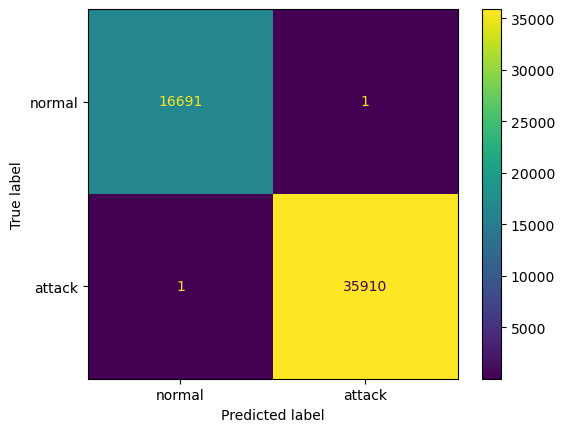

In [46]:
model_rf = RandomForestClassifier(max_depth=20, random_state=0)

start = time.time()
model_rf.fit(X_train, y_train)
end = time.time()
print('Training time: ' + str(round(end-start, 2)) + ' sec')

y_pred = model_rf.predict(X_test)

print("accuracy of the model",accuracy_score(y_test, y_pred))

#Classification report
print("classification report:\n",classification_report(y_test,y_pred,target_names = ['normal','attack']))

#confusion matrix
print("confusion matrix:\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,display_labels = ['normal','attack'])
plt.show()